# Experiment 8
___
Compare the models SVM , decision tree , random forest and xgboost by tuning their hyperparameters using gridsearchCV

## Steps:
1. Load Dataset
2. Preprocess the data
3. Split Data
4. Define Hyperparameter grid
- f1_estimators : [50,100,200]
- max_depth : [None, 10, 20, 30]
- min_samples_split: [2,5,10]
- min_samples_leaf: [1,2,4]
5. Perform grid search: Use GridSearchCV with cv=5
6. Train and evaluate: Asess performance on the test set
7. Report results: Print the best parameneters and test accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Step 1: Load Dataset

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "johnsmith88/heart-disease-dataset",
    file_path,
)

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 records:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nTarget distribution:")
print(df['target'].value_counts())

Dataset shape: (1025, 14)

First 5 records:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset info:
<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   

## Step 2: Preprocess the data

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Features shape: (1025, 13)
Target shape: (1025,)


## Step 3: Split Data

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTraining target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())

Training set shape: (820, 13)
Test set shape: (205, 13)

Training target distribution:
target
1    421
0    399
Name: count, dtype: int64

Test target distribution:
target
1    105
0    100
Name: count, dtype: int64


## Step 4: Define Hyperparameter Grids

In [5]:
# Define hyperparameter grids for each model

# SVM hyperparameters
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.001, 0.01]
}

# Decision Tree hyperparameters
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grids defined successfully!")
print("\nSVM parameters:", list(svm_param_grid.keys()))
print("Decision Tree parameters:", list(dt_param_grid.keys()))
print("Random Forest parameters:", list(rf_param_grid.keys()))

Hyperparameter grids defined successfully!

SVM parameters: ['C', 'kernel', 'gamma']
Decision Tree parameters: ['max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion']
Random Forest parameters: ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']


## Step 5 & 6: Perform Grid Search and Train Models

In [6]:
# Dictionary to store results
results = {}

print("=" * 60)
print("MODEL COMPARISON WITH GRIDSEARCHCV")
print("=" * 60)

MODEL COMPARISON WITH GRIDSEARCHCV


### SVM with GridSearchCV

In [7]:
print("\n" + "=" * 60)
print("1. SUPPORT VECTOR MACHINE (SVM)")
print("=" * 60)

# Initialize SVM
svm = SVC(random_state=42)

# Perform Grid Search
svm_grid = GridSearchCV(
    svm, 
    svm_param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on scaled data (SVM requires scaling)
svm_grid.fit(X_train_scaled, y_train)

# Make predictions
svm_pred = svm_grid.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Store results
results['SVM'] = {
    'best_params': svm_grid.best_params_,
    'best_cv_score': svm_grid.best_score_,
    'test_accuracy': svm_accuracy
}

print(f"\nBest Parameters: {svm_grid.best_params_}")
print(f"Best CV Accuracy: {svm_grid.best_score_:.4f}")
print(f"Test Accuracy: {svm_accuracy:.4f}")


1. SUPPORT VECTOR MACHINE (SVM)
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9793
Test Accuracy: 1.0000


### Decision Tree with GridSearchCV

In [8]:
print("\n" + "=" * 60)
print("2. DECISION TREE")
print("=" * 60)

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
dt_grid = GridSearchCV(
    dt, 
    dt_param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on original data (Decision trees don't require scaling)
dt_grid.fit(X_train, y_train)

# Make predictions
dt_pred = dt_grid.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Store results
results['Decision Tree'] = {
    'best_params': dt_grid.best_params_,
    'best_cv_score': dt_grid.best_score_,
    'test_accuracy': dt_accuracy
}

print(f"\nBest Parameters: {dt_grid.best_params_}")
print(f"Best CV Accuracy: {dt_grid.best_score_:.4f}")
print(f"Test Accuracy: {dt_accuracy:.4f}")


2. DECISION TREE
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.9890
Test Accuracy: 1.0000


### Random Forest with GridSearchCV

In [9]:
print("\n" + "=" * 60)
print("3. RANDOM FOREST")
print("=" * 60)

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
rf_grid = GridSearchCV(
    rf, 
    rf_param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on original data
rf_grid.fit(X_train, y_train)

# Make predictions
rf_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Store results
results['Random Forest'] = {
    'best_params': rf_grid.best_params_,
    'best_cv_score': rf_grid.best_score_,
    'test_accuracy': rf_accuracy
}

print(f"\nBest Parameters: {rf_grid.best_params_}")
print(f"Best CV Accuracy: {rf_grid.best_score_:.4f}")
print(f"Test Accuracy: {rf_accuracy:.4f}")


3. RANDOM FOREST
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9854
Test Accuracy: 1.0000


### XGBoost with GridSearchCV

In [10]:
print("\n" + "=" * 60)
print("4. XGBOOST")
print("=" * 60)

try:
    import xgboost as xgb
    
    # XGBoost hyperparameters
    xgb_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0]
    }
    
    # Initialize XGBoost
    xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    
    # Perform Grid Search
    xgb_grid = GridSearchCV(
        xgb_model, 
        xgb_param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit on original data
    xgb_grid.fit(X_train, y_train)
    
    # Make predictions
    xgb_pred = xgb_grid.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    
    # Store results
    results['XGBoost'] = {
        'best_params': xgb_grid.best_params_,
        'best_cv_score': xgb_grid.best_score_,
        'test_accuracy': xgb_accuracy
    }
    
    print(f"\nBest Parameters: {xgb_grid.best_params_}")
    print(f"Best CV Accuracy: {xgb_grid.best_score_:.4f}")
    print(f"Test Accuracy: {xgb_accuracy:.4f}")
    
except ImportError:
    print("\nXGBoost not installed. Installing...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    print("Please restart the kernel and run this cell again.")


4. XGBOOST

XGBoost not installed. Installing...
Please restart the kernel and run this cell again.


## Step 7: Report Results

In [11]:
print("\n" + "=" * 80)
print("FINAL RESULTS SUMMARY")
print("=" * 80)

# Create a summary DataFrame
summary_data = []
for model_name, result in results.items():
    summary_data.append({
        'Model': model_name,
        'Best CV Score': f"{result['best_cv_score']:.4f}",
        'Test Accuracy': f"{result['test_accuracy']:.4f}",
        'Best Parameters': str(result['best_params'])
    })

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

# Find best model
best_model = max(results.items(), key=lambda x: x[1]['test_accuracy'])
print("\n" + "=" * 80)
print(f"BEST MODEL: {best_model[0]}")
print(f"Test Accuracy: {best_model[1]['test_accuracy']:.4f}")
print("=" * 80)


FINAL RESULTS SUMMARY


        Model Best CV Score Test Accuracy                                                                            Best Parameters
          SVM        0.9793        1.0000                                              {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Decision Tree        0.9890        1.0000 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest        0.9854        1.0000      {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

BEST MODEL: SVM
Test Accuracy: 1.0000


## Visualization of Results

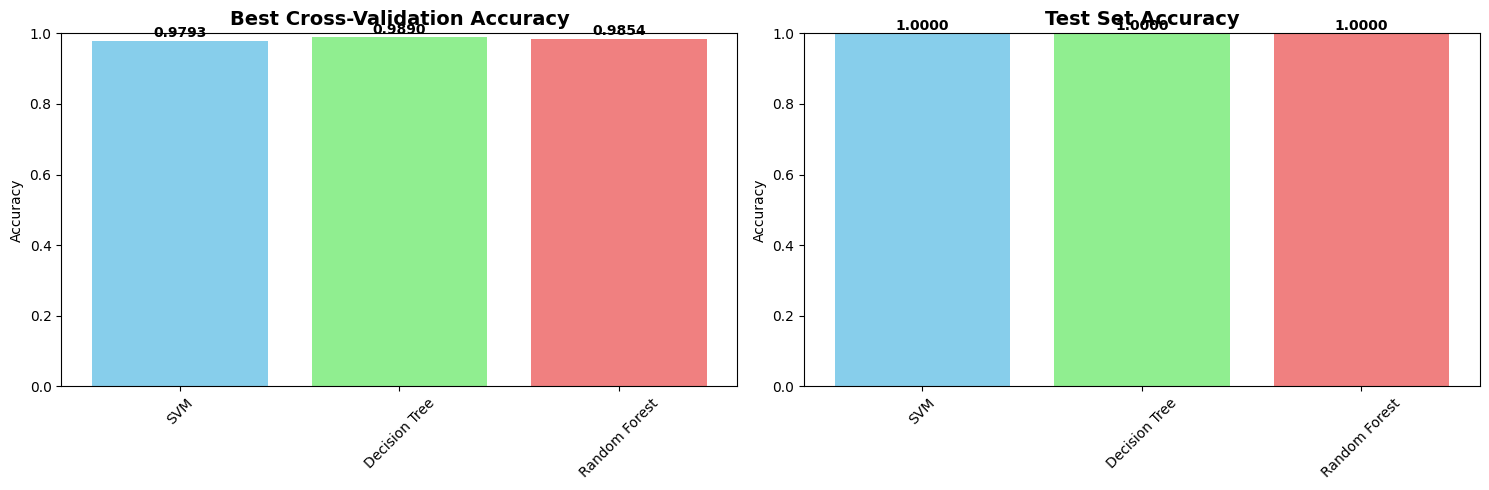

In [12]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

models = list(results.keys())
cv_scores = [results[model]['best_cv_score'] for model in models]
test_scores = [results[model]['test_accuracy'] for model in models]

# Plot 1: Cross-Validation Scores
axes[0].bar(models, cv_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
axes[0].set_title('Best Cross-Validation Accuracy', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
for i, v in enumerate(cv_scores):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Test Accuracy
axes[1].bar(models, test_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
axes[1].set_title('Test Set Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0, 1)
for i, v in enumerate(test_scores):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Detailed Classification Reports

In [13]:
# Print detailed classification reports
print("\n" + "=" * 80)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 80)

predictions = {
    'SVM': svm_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred
}

if 'XGBoost' in results:
    predictions['XGBoost'] = xgb_pred

for model_name, y_pred in predictions.items():
    print(f"\n{model_name}:")
    print("-" * 40)
    print(classification_report(y_test, y_pred))


DETAILED CLASSIFICATION REPORTS

SVM:
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Decision Tree:
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Random Forest:
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00